In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os

# dimensions of our images.
img_width, img_height = 150, 150
PATH = os.path.join(os.path.dirname("D:\\machine_learning_and _iot\\chest_xray"), 'chest_xray')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')

nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('x_ray.h5')    # saving the trained model

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.

Epoch 1/10
125/125 [==============================] - 127s 1s/step - loss: 0.5595 - accuracy: 0.7508 - val_loss: 1.2072 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 119s 951ms/step - loss: 0.3918 - accuracy: 0.8155 - val_loss: 0.7728 - val_accuracy: 0.6875
Epoch 3/10
125/125 [==============================] - 110s 883ms/step - loss: 0.3125 - accuracy: 0.8660 - val_loss: 0.8728 - val_accuracy: 0.6875
Epoch 4/10
125/125 [==============================] - 85s 683ms/step - loss: 0.3135 - accuracy: 0.8658 - val_loss: 1.5916 - val_accuracy: 0.6250
Epoch 5/10
125/125 [==============================] - 85s 680ms/step - loss: 0.2959 - accuracy: 0.8633 - val_loss: 0.7620 - val_accuracy: 0.7500
Epoch 6/10
125/1

In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
#test_it = datagen.flow_from_directory('D:\machine_learning_and _iot\chest_xray\train\PNEUMONIA')
model=load_model('x_ray.h5')
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
    np_image = Image.open(filename) #Open the image
    np_image = np.array(np_image).astype('float32')/255 #Creates a numpy array as float and divides by 255.
    np_image = transform.resize(np_image, (150, 150, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

   #picture1 prediction
def predict():
    #label_map = (test_it.class_indices)
    #print (label_map)

    image_to_predict = load("D:\\machine_learning_and _iot\\chest_xray\\train\PNEUMONIA\\person1_bacteria_1.jpeg")
    result = model.predict(image_to_predict)
    result= np.around(result,decimals=3)
    result=result*100
    print (result)
    return result
if __name__=="__main__":
        print(predict())

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

[[47.600002 51.300003]]
[[47.600002 51.300003]]


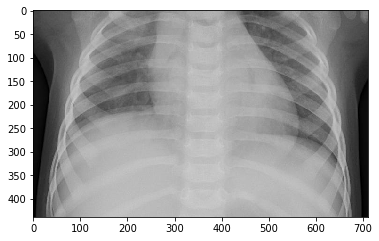

In [4]:
import matplotlib.pyplot as plt
#import cv2
img=plt.imread("D:\\machine_learning_and _iot\\chest_xray\\train\PNEUMONIA\\person1_bacteria_1.jpeg")
plt.imshow(img)